# Underwriting Model for Personal Loans

## 1. Problem Statement
### The purpose of this project is to develop an underwriting model using machine learning and deep learning techniques to predict the risk of personal loans. The model will utilize attributes such as FICO scores, debt-to-income (DTI) ratios, loan amounts, and other relevant data sourced from credit bureaus.

## 2. Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# Ignore warnings in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Loading
df= pd.read_csv('loan_data.csv')
df.head()

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [3]:
df.tail()

credit.policy             purpose  int.rate  installment  \
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1

In [4]:
# Replace the dot in the column names with an underscore
df.columns = df.columns.str.lower().str.replace('.', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace('.', '_')

df.head()

credit_policy             purpose  int_rate  installment  log_annual_inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days_with_cr_line  revol_bal  revol_util  inq_last_6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq_2yrs  pub_rec  not_fully_paid  
0            0        0               0  
1            0        0               0  
2            0        0               0  
3            0        0               0  
4            1        0               0

In [5]:
df.tail()

credit_policy             purpose  int_rate  installment  \
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log_annual_inc    dti  fico  days_with_cr_line  revol_bal  revol_util  \
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq_last_6mths  delinq_2yrs  pub_rec  not_fully_paid  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1

### Dataset Variable Description
- credit_policy: Indicates whether the borrower meets the lending institution's credit underwriting criteria (1 = Yes, 0 = No).
- purpose: The purpose of the loan, represented as categorical values such as "debt_consolidation," "credit_card," etc.
- int_rate: The interest rate on the loan.
- installment: The fixed monthly payment to be made by the borrower.
- log_annual_inc: The natural logarithm of the borrower’s self-reported annual income.
- dti: Debt-to-income ratio, calculated as the total monthly debt payments divided by monthly income.
- fico: The borrower’s FICO. credit score
- days_with_cr_line: The number of days the borrower has had a credit line.
- revol_bal: The borrower’s revolving balance (total balance on credit cards and other revolving credit accounts).
- revol_util: Revolving line utilization rate, the amount of credit the borrower is using relative to their credit limit.
- inq_last_6mths: The number of inquiries by lenders in the borrower’s credit report in the last 6 months.
- delinq_2yrs: The number of delinquent credit lines in the borrower’s credit history in the past 2 years.
- pub_rec: The number of derogatory public records (e.g., bankruptcies, tax liens).
- not_fully_paid: A binary variable indicating whether the borrower did not fully pay back the loan (1 = loan was not fully paid, 0 = loan was fully paid).
- purpose_numerical: A numerical encoding of the categorical loan purpose variable.

credit_policy is the target variable to predict.

In [6]:
# Display unique values in the 'purpose' column
unique_values = df['purpose'].unique()
print("Unique values in 'purpose':", unique_values)

Unique values in 'purpose': ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


In [7]:
df

credit_policy             purpose  int_rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log_annual_inc    dti  fico  days_with_cr_line  revol_bal  revol_util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq_last_6mths  delinq_2yrs  pub_rec  not_fully_paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

In [8]:
df.shape

(9578, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
df.describe()

credit_policy     int_rate  installment  log_annual_inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days_with_cr_line     revol_bal   revol_util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq_last_6mths  delinq_2yrs      pub_rec  not_fully_paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

In [11]:
print(df.columns)

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')


In [12]:
# check if there is missing data
df.isnull().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

## 3. Exploratory Data Analysis(EDA)

### Categorical Variables

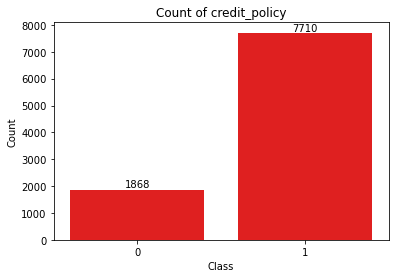

In [13]:
# Create a bar plot that shows the total counts per class('credit_policy') value
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='credit_policy', palette=['red'])
# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
#plt.xticks(rotation=0)

# Add labels and title
plt.title('Count of credit_policy')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()

Out of 9,578 cases, 7,710 have been approved for personal loans, accounting for approximately 80.5% of the total cases.

not_fully_paid
0    0.832318
1    0.661448
Name: credit_policy, dtype: float64


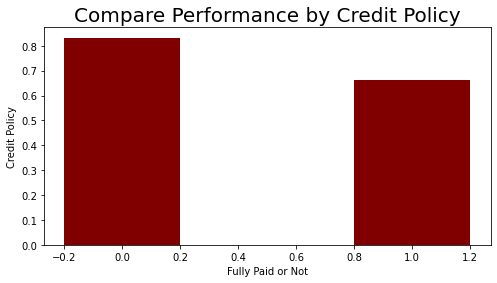

In [16]:
# check whether customers receving different credit policy show significant difference in performance
print(df.groupby('not_fully_paid')['credit_policy'].mean())

sum_temp=df.groupby('not_fully_paid')['credit_policy'].mean().reset_index()

fig = plt.figure(figsize = (8, 4))

# creating the bar plot
plt.bar(sum_temp['not_fully_paid'], sum_temp['credit_policy'], color ='maroon', 
        width = 0.4)

plt.xlabel("Fully Paid or Not")
plt.ylabel("Credit Policy")
plt.title("Compare Performance by Credit Policy", fontsize=20)
plt.show()

The average Credit Policy score is higher for cases where 'not_fully_paid' is True.

purpose
all_other             0.787216
credit_card           0.808241
debt_consolidation    0.814506
educational           0.740525
home_improvement      0.813990
major_purchase        0.848970
small_business        0.799677
Name: credit_policy, dtype: float64


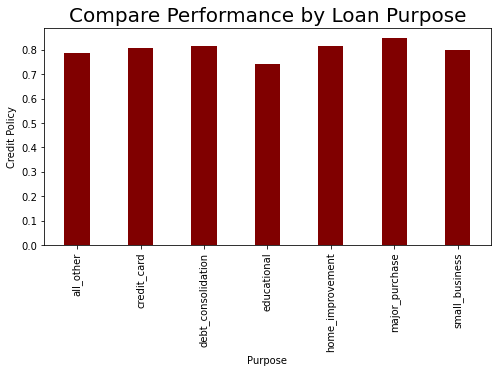

In [17]:
print(df.groupby('purpose')['credit_policy'].mean())

sum_temp=df.groupby('purpose')['credit_policy'].mean().reset_index()

fig = plt.figure(figsize = (8, 4))

# creating the bar plot
plt.bar(sum_temp['purpose'], sum_temp['credit_policy'], color ='maroon', 
        width = 0.4)

plt.xlabel("Purpose")
plt.ylabel("Credit Policy")
plt.xticks(rotation=90)
plt.title("Compare Performance by Loan Purpose", fontsize=20)
plt.show()

The average Credit Policy score ranges from 0.74 to 0.85, indicating some variation across different purposes.

In [18]:
# Convert categorial values for load purpose to dummy variables. 
# I deliberately did not encode 'all-others' in order to avoid the problem of perfect multicollinearity in a later regression.
df['debt_consolidation'] = np.where(df['purpose']=='debt_consolidation',1,0)
df['credit_card'] = np.where(df['purpose']=='credit_card',1,0)
df['home_improvement'] = np.where(df['purpose']=='home_improvement',1,0)
df['small_business'] = np.where(df['purpose']=='small_business',1,0)
df['major_purchase'] = np.where(df['purpose']=='major_purchase',1,0)
df['educational'] = np.where(df['purpose']=='educational',1,0)

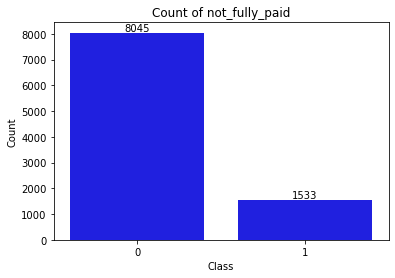

In [19]:
# Create a bar plot that shows the total counts per class('not_fully_paid') value
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='not_fully_paid', palette=['blue'])
# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')
#plt.xticks(rotation=0)

# Add labels and title
plt.title('Count of not_fully_paid')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()

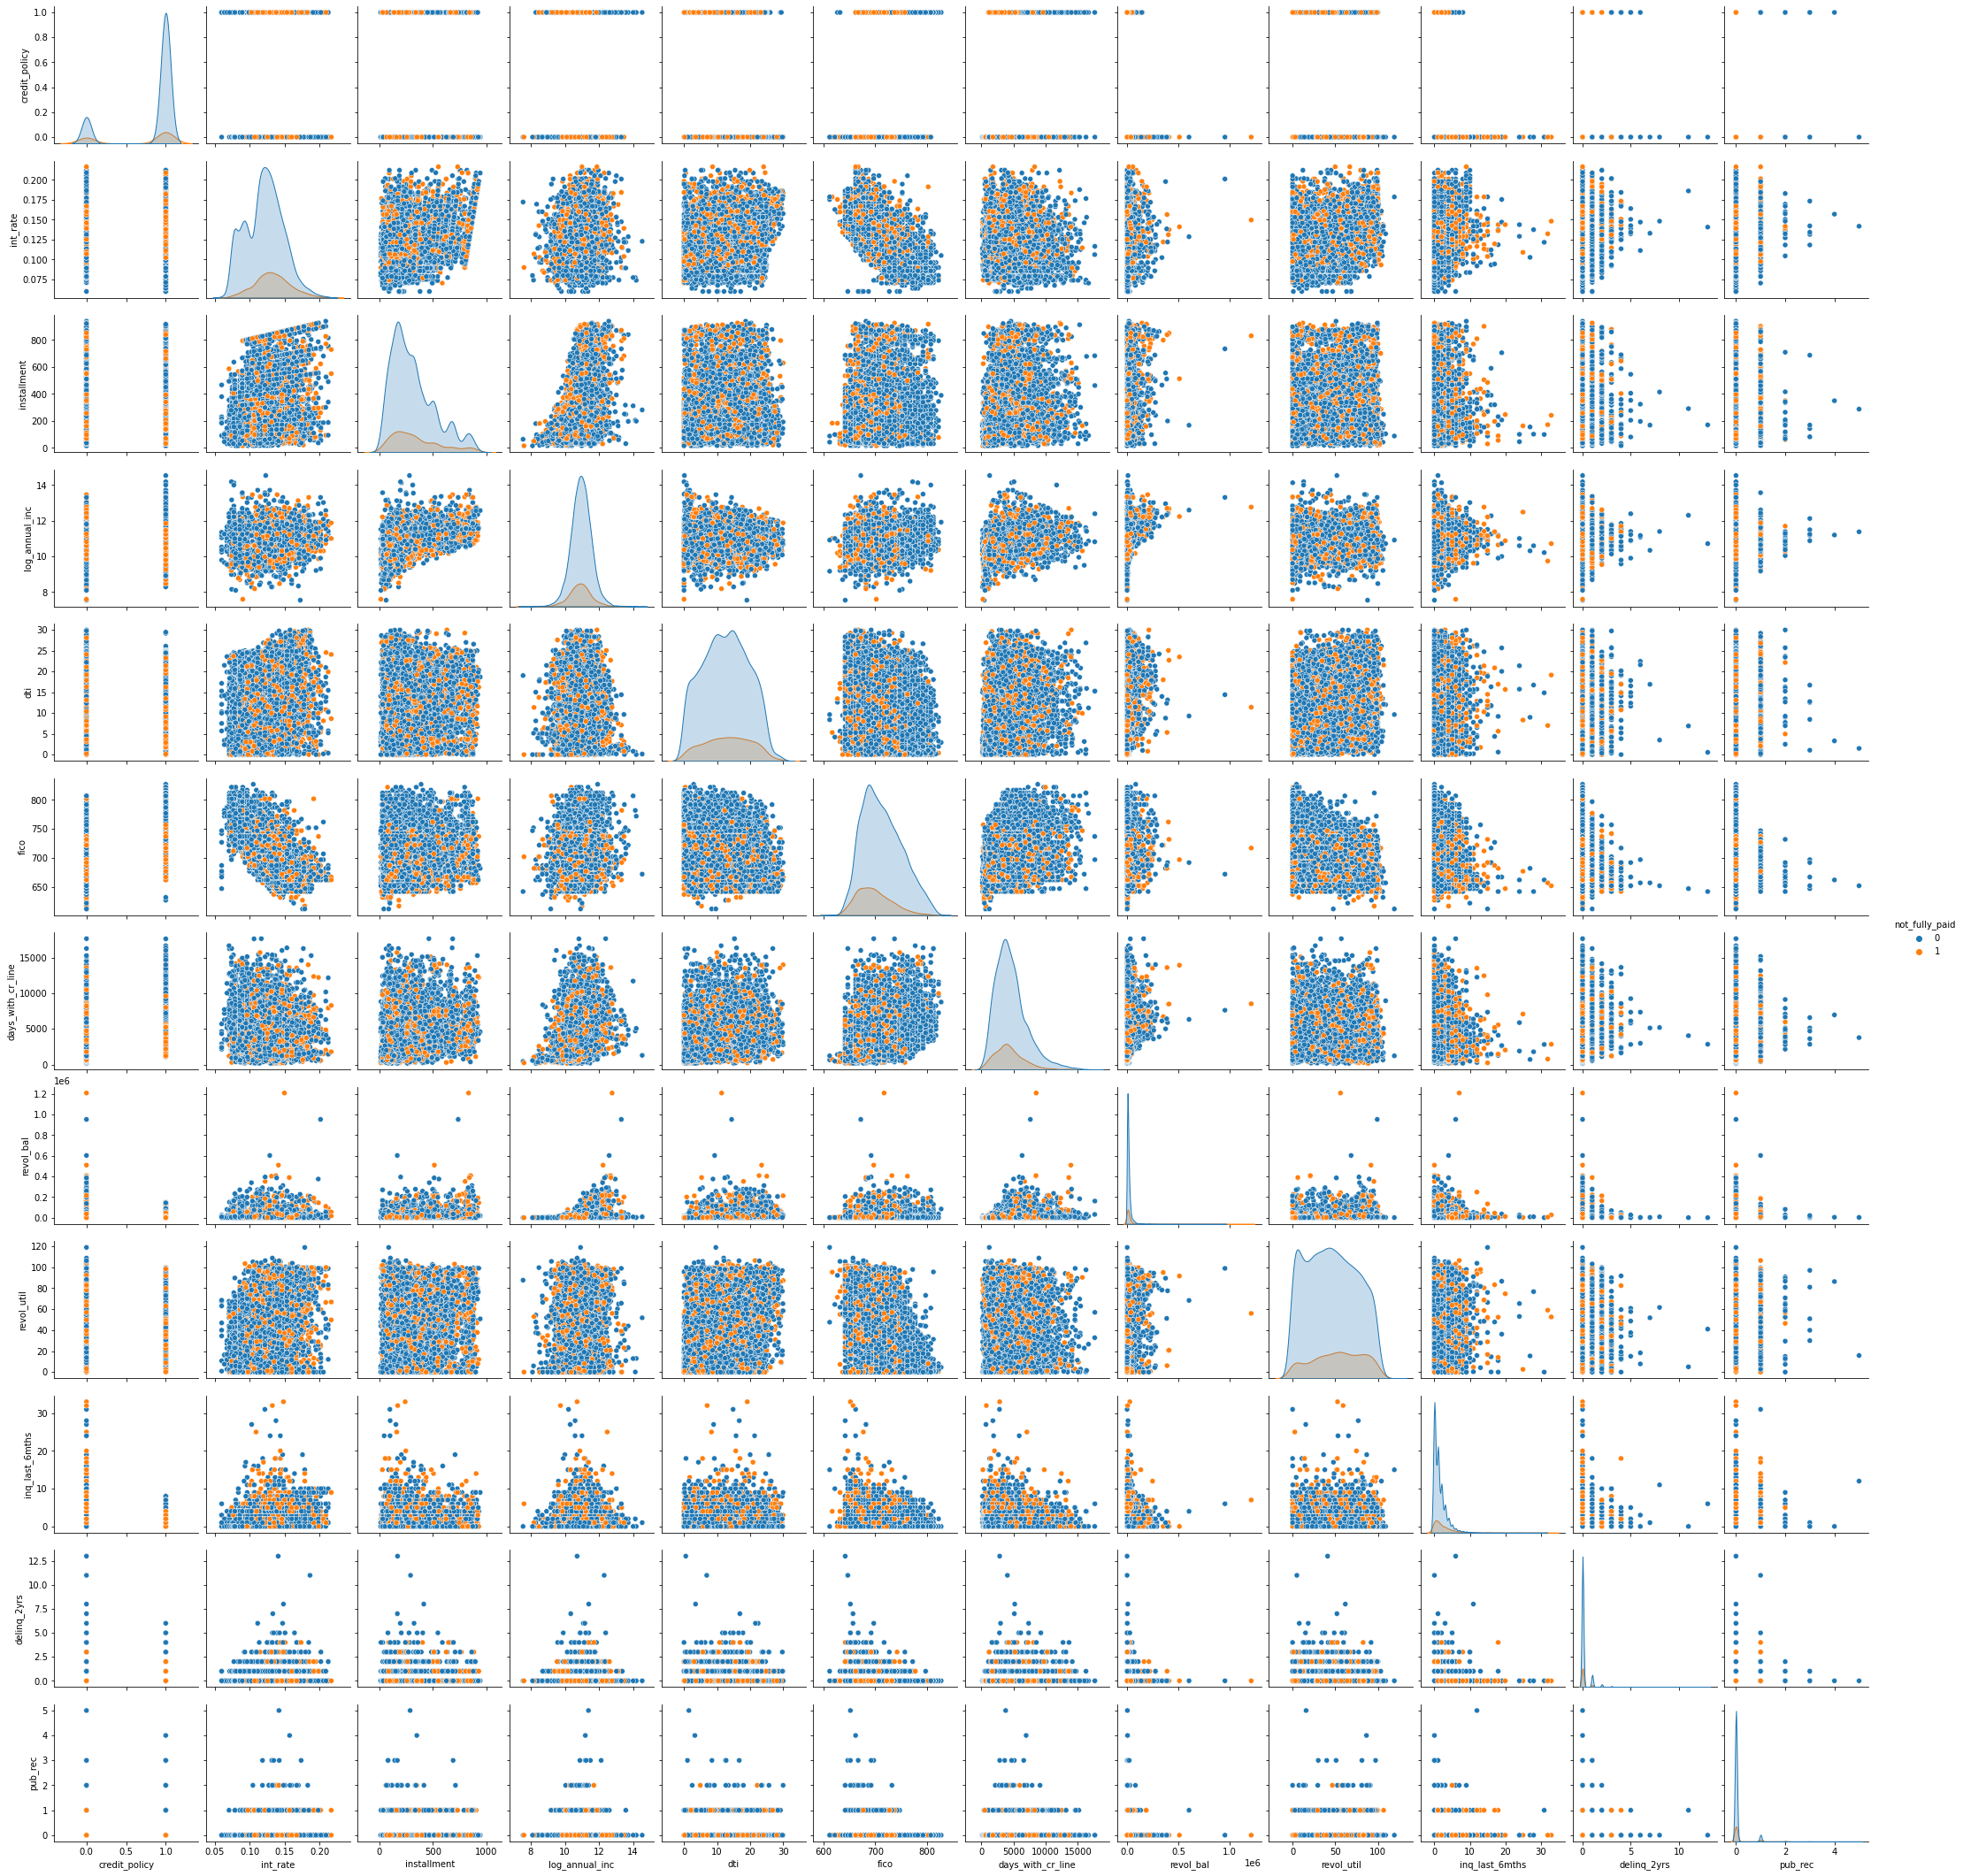

In [20]:
# Select the columns
selected_columns = df[['credit_policy',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid']]
#print(selected_columns)

# Create a pairplot for the selected columns
sns.pairplot(selected_columns, hue='not_fully_paid')
plt.show()

### Numerical Variables

xrank
(0.999, 1916.4]     0.945720
(1916.4, 3831.8]    0.859008
(3831.8, 5747.2]    0.878914
(5747.2, 7662.6]    0.739426
(7662.6, 9578.0]    0.601775
Name: credit_policy, dtype: float64


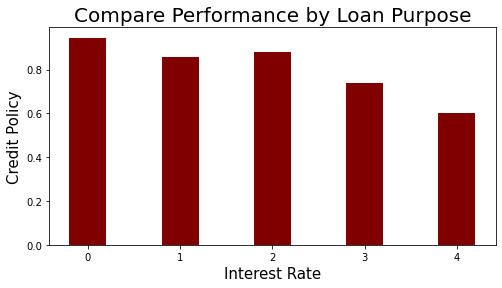

In [21]:
# analyze performance by continuous variables
df['xrank']=df['int_rate'].rank(method='first')
df['xrank']=pd.qcut(df['xrank'], q=5)

print(df.groupby('xrank')['credit_policy'].mean())

sum_temp=df.groupby('xrank')['credit_policy'].mean().reset_index()
sum_temp['xrank']=sum_temp['xrank'].cat.codes
fig = plt.figure(figsize = (8, 4))

# creating the bar plot
plt.bar(sum_temp['xrank'], sum_temp['credit_policy'], color ='maroon', 
        width = 0.4)

plt.xlabel("Interest Rate", fontsize=15)
plt.ylabel("Credit Policy", fontsize=15)
plt.title("Compare Performance by {}".format("Loan Purpose"), fontsize=20)
plt.show()

In general, groups with higher interest rates tend to have a lower average Credit Policy.

xrank
(0.999, 1916.4]     0.746347
(1916.4, 3831.8]    0.796867
(3831.8, 5747.2]    0.824635
(5747.2, 7662.6]    0.830287
(7662.6, 9578.0]    0.826722
Name: credit_policy, dtype: float64


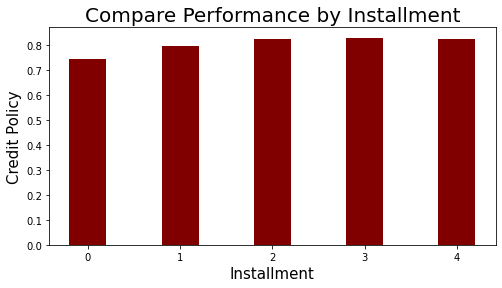

xrank
(0.999, 1916.4]     0.766180
(1916.4, 3831.8]    0.804700
(3831.8, 5747.2]    0.840292
(5747.2, 7662.6]    0.824543
(7662.6, 9578.0]    0.789144
Name: credit_policy, dtype: float64


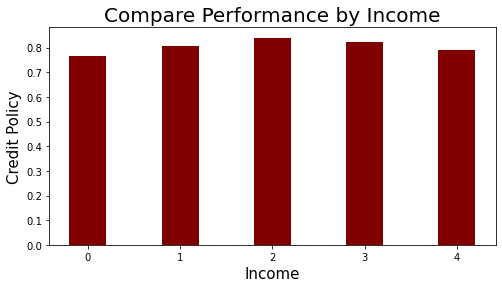

xrank
(0.999, 1916.4]     0.808455
(1916.4, 3831.8]    0.840731
(3831.8, 5747.2]    0.837683
(5747.2, 7662.6]    0.808877
(7662.6, 9578.0]    0.729123
Name: credit_policy, dtype: float64


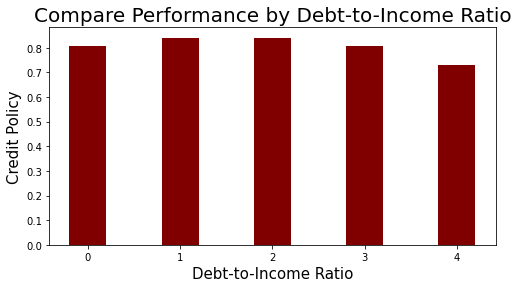

xrank
(0.999, 1916.4]     0.573069
(1916.4, 3831.8]    0.779634
(3831.8, 5747.2]    0.844990
(5747.2, 7662.6]    0.860574
(7662.6, 9578.0]    0.966597
Name: credit_policy, dtype: float64


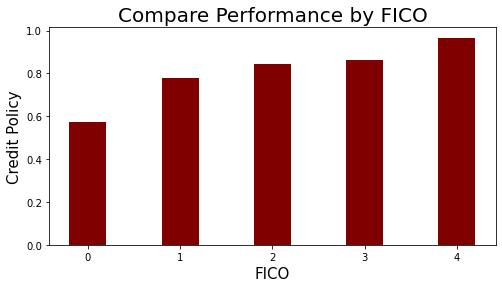

xrank
(0.999, 1916.4]     0.697808
(1916.4, 3831.8]    0.825587
(3831.8, 5747.2]    0.835595
(5747.2, 7662.6]    0.842820
(7662.6, 9578.0]    0.823069
Name: credit_policy, dtype: float64


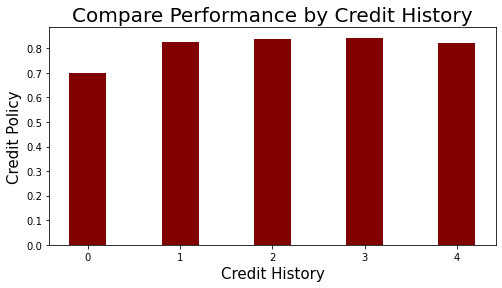

xrank
(0.999, 1916.4]     0.766701
(1916.4, 3831.8]    0.816188
(3831.8, 5747.2]    0.837161
(5747.2, 7662.6]    0.859008
(7662.6, 9578.0]    0.745825
Name: credit_policy, dtype: float64


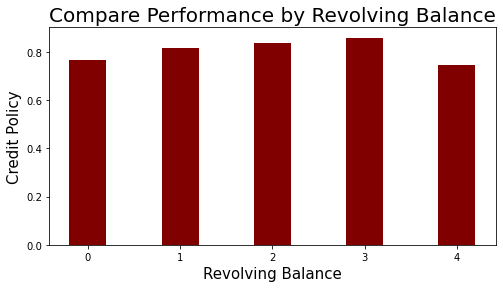

xrank
(0.999, 1916.4]     0.857516
(1916.4, 3831.8]    0.836554
(3831.8, 5747.2]    0.808977
(5747.2, 7662.6]    0.784334
(7662.6, 9578.0]    0.737474
Name: credit_policy, dtype: float64


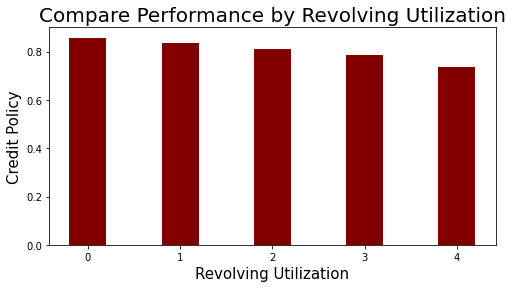

xrank
(0.999, 1916.4]     1.000000
(1916.4, 3831.8]    0.854308
(3831.8, 5747.2]    1.000000
(5747.2, 7662.6]    0.796345
(7662.6, 9578.0]    0.374217
Name: credit_policy, dtype: float64


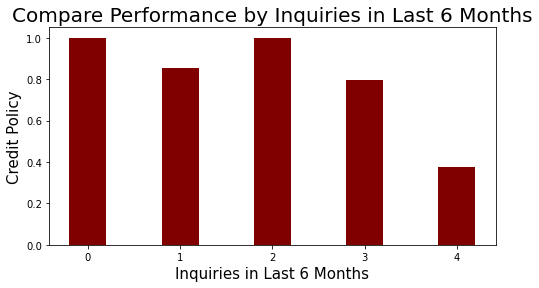

xrank
(0.999, 1916.4]     1.000000
(1916.4, 3831.8]    1.000000
(3831.8, 5747.2]    1.000000
(5747.2, 7662.6]    0.589556
(7662.6, 9578.0]    0.435282
Name: credit_policy, dtype: float64


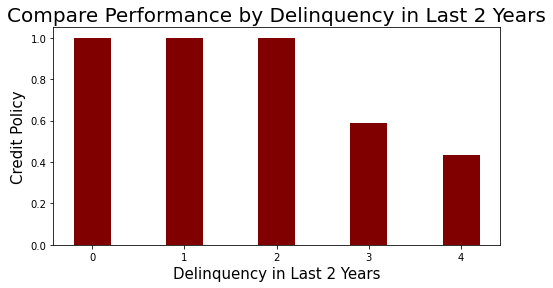

xrank
(0.999, 1916.4]     1.000000
(1916.4, 3831.8]    1.000000
(3831.8, 5747.2]    1.000000
(5747.2, 7662.6]    0.812533
(7662.6, 9578.0]    0.212422
Name: credit_policy, dtype: float64


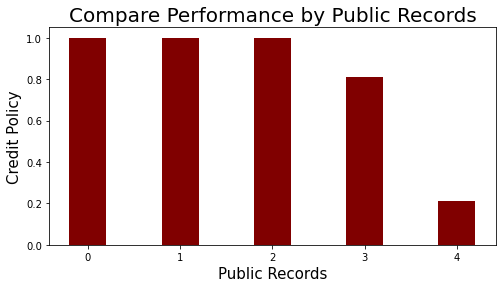

In [22]:
# write a function for above plot
def numvar(x, xname):
    df['xrank']=df[x].rank(method='first')
    df['xrank']=pd.qcut(df['xrank'], q=5)

    print(df.groupby('xrank')['credit_policy'].mean())

    sum_temp=df.groupby('xrank')['credit_policy'].mean().reset_index()
    sum_temp['xrank']=sum_temp['xrank'].cat.codes
    fig = plt.figure(figsize = (8, 4))

    # creating the bar plot
    plt.bar(sum_temp['xrank'], sum_temp['credit_policy'], color ='maroon', 
            width = 0.4)

    plt.xlabel(xname, fontsize=15)
    plt.ylabel("Credit Policy", fontsize=15)
    plt.title("Compare Performance by {}".format(xname), fontsize=20)
    plt.show()
    
numvar('installment', 'Installment')
numvar('log_annual_inc', 'Income')
numvar('dti', 'Debt-to-Income Ratio')
numvar('fico', 'FICO')
numvar('days_with_cr_line', 'Credit History')
numvar('revol_bal', 'Revolving Balance')
numvar('revol_util', 'Revolving Utilization')
numvar('inq_last_6mths', 'Inquiries in Last 6 Months')
numvar('delinq_2yrs', 'Delinquency in Last 2 Years')
numvar('pub_rec', 'Public Records')

Significant Impact:
Variables such as 'FICO', 'Credit History', 'Revolving Utilization', 'Delinquency in Last 2 Years', and 'Public Records' exhibit significant influence on Credit Policy.

Small Impact:
Variables like 'Installment', 'Income', 'DTI', and 'Revolving Balance' show only a minor effect on Credit Policy.

In [23]:
df.columns.tolist()

['credit_policy',
 'purpose',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational',
 'xrank']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]),
 [Text(0.5, 0, 'credit_policy'),
  Text(1.5, 0, 'int_rate'),
  Text(2.5, 0, 'installment'),
  Text(3.5, 0, 'log_annual_inc'),
  Text(4.5, 0, 'dti'),
  Text(5.5, 0, 'fico'),
  Text(6.5, 0, 'days_with_cr_line'),
  Text(7.5, 0, 'revol_bal'),
  Text(8.5, 0, 'revol_util'),
  Text(9.5, 0, 'inq_last_6mths'),
  Text(10.5, 0, 'delinq_2yrs'),
  Text(11.5, 0, 'pub_rec'),
  Text(12.5, 0, 'not_fully_paid')])

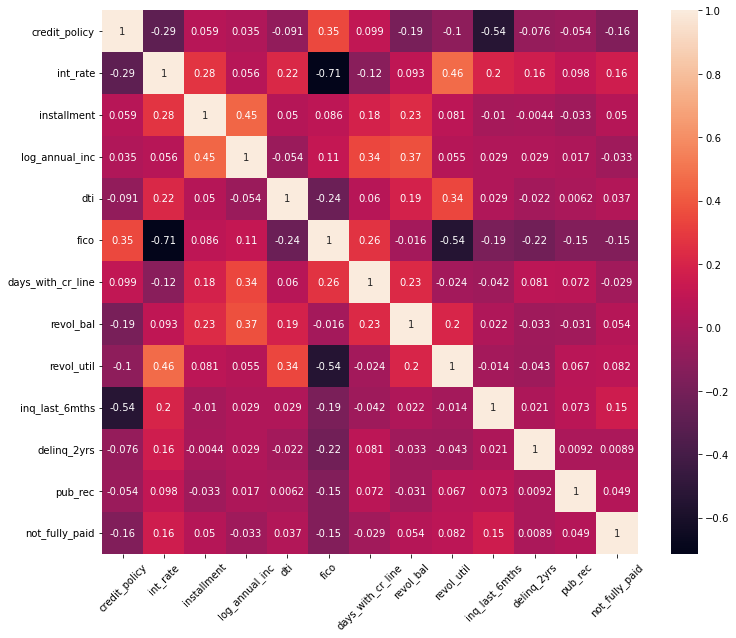

In [25]:
# Create a heatmap that displays the correlation between these columns
numeric_columns=['credit_policy',
                 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid'
]

fig = plt.figure(figsize = (12, 10))

sns.heatmap(df[numeric_columns].corr(), annot=True)
# Rotate x-ticks
plt.xticks(rotation=45)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   credit_policy       9578 non-null   int64   
 1   purpose             9578 non-null   object  
 2   int_rate            9578 non-null   float64 
 3   installment         9578 non-null   float64 
 4   log_annual_inc      9578 non-null   float64 
 5   dti                 9578 non-null   float64 
 6   fico                9578 non-null   int64   
 7   days_with_cr_line   9578 non-null   float64 
 8   revol_bal           9578 non-null   int64   
 9   revol_util          9578 non-null   float64 
 10  inq_last_6mths      9578 non-null   int64   
 11  delinq_2yrs         9578 non-null   int64   
 12  pub_rec             9578 non-null   int64   
 13  not_fully_paid      9578 non-null   int64   
 14  debt_consolidation  9578 non-null   int32   
 15  credit_card         9578 non-null   in

In [27]:
# # Filter rows where 'credit_policy' is not equal to 1
# Remove rows where credit_policy = 0
#dfn = df[df['credit_policy'] != 0]
dfn=df.copy()

# Reset the index (optional, for a cleaner dataset)
dfn.reset_index(drop=True, inplace=True)
dfn

credit_policy             purpose  int_rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log_annual_inc    dti  fico  days_with_cr_line  revol_bal  revol_util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      ...  delinq_2yrs  pub_rec  not_fully_paid  debt_consolidation  \
0     ...            0        0               0                   1   
1     ...            0        0               0                   0   
2     ...            0        0               0                   1   
3     ...            0        0               0                   1   
4     ...            1        0               0                   0   
...   ...          ...      ...             ...                 ...   
9573  ...            0        0               1                   0   
9574  ...            0        0               1                   0   
9575  ...            0        0               1                   1   
9576  ...            0        0               1                   0   
9577  ...            0        0               1                   1   

      credit_card  home_improvement  small_business  major_purchase  \
0               0                 0               0               0   
1               1                 0               0               0   
2               0                 0               0               0   
3               0                 0               0               0   
4               1                 0               0               0   
...           ...               ...             ...             ...   
9573            0                 0               0               0   
9574            0                 0               0               0   
9575            0                 0               0               0   
9576            0                 1               0               0   
9577            0                 0               0               0   

      educational             xrank  
0               0   (0.999, 1916.4]  
1               0   (0.999, 1916.4]  
2               0   (0.999, 1916.4]  
3               0   (0.999, 1916.4]  
4               0   (0.999, 1916.4]  
...           ...               ...  
9573            0  (7662.6, 9578.0]  
9574            0  (7662.6, 9578.0]  
9575            0  (7662.6, 9578.0]  
9576            0  (7662.6, 9578.0]  
9577            0  (7662.6, 9578.0]  

[9578 rows x 21 columns]

In [28]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   credit_policy       9578 non-null   int64   
 1   purpose             9578 non-null   object  
 2   int_rate            9578 non-null   float64 
 3   installment         9578 non-null   float64 
 4   log_annual_inc      9578 non-null   float64 
 5   dti                 9578 non-null   float64 
 6   fico                9578 non-null   int64   
 7   days_with_cr_line   9578 non-null   float64 
 8   revol_bal           9578 non-null   int64   
 9   revol_util          9578 non-null   float64 
 10  inq_last_6mths      9578 non-null   int64   
 11  delinq_2yrs         9578 non-null   int64   
 12  pub_rec             9578 non-null   int64   
 13  not_fully_paid      9578 non-null   int64   
 14  debt_consolidation  9578 non-null   int32   
 15  credit_card         9578 non-null   in

In [29]:
dfn.columns.tolist()

['credit_policy',
 'purpose',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational',
 'xrank']

## 4. Machine Learning

In [37]:
# Select relevant columns
dfn = dfn[['credit_policy',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'not_fully_paid',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']]

# Separate the features from the labels into X and y, Define features (X) and target (y)
X = dfn[['not_fully_paid',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']]  # Predictor

y = dfn['credit_policy']            # Target

### Model 1 - logistic regression

Validation Accuracy: 0.8705636743215032
Validation Confusion Matrix:
[[ 138  219]
 [  29 1530]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.39      0.53       357
           1       0.87      0.98      0.93      1559

    accuracy                           0.87      1916
   macro avg       0.85      0.68      0.73      1916
weighted avg       0.87      0.87      0.85      1916



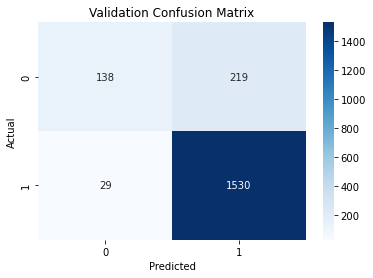

Test Accuracy: 0.8627348643006263
Test Confusion Matrix:
[[ 150  226]
 [  37 1503]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.40      0.53       376
           1       0.87      0.98      0.92      1540

    accuracy                           0.86      1916
   macro avg       0.84      0.69      0.73      1916
weighted avg       0.86      0.86      0.84      1916



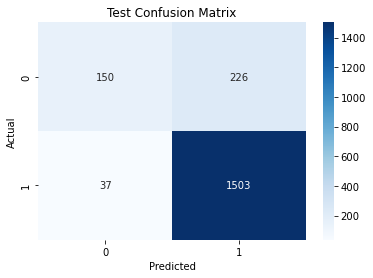

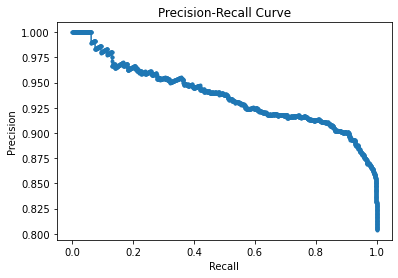

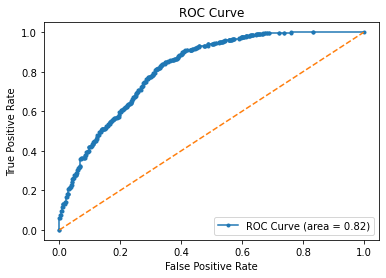

               Feature  Coefficient
0       not_fully_paid    -0.020141
1             int_rate    -0.003071
2          installment     0.001343
3       log_annual_inc    -0.045329
4                  dti    -0.140031
5                 fico     0.005451
6    days_with_cr_line     0.000199
7            revol_bal    -0.000019
8           revol_util     0.001836
9       inq_last_6mths    -0.452852
10         delinq_2yrs    -0.017152
11             pub_rec    -0.006538
12  debt_consolidation     0.000270
13         credit_card     0.002251
14    home_improvement    -0.000507
15      small_business    -0.000359
16      major_purchase     0.001167
17         educational    -0.001310


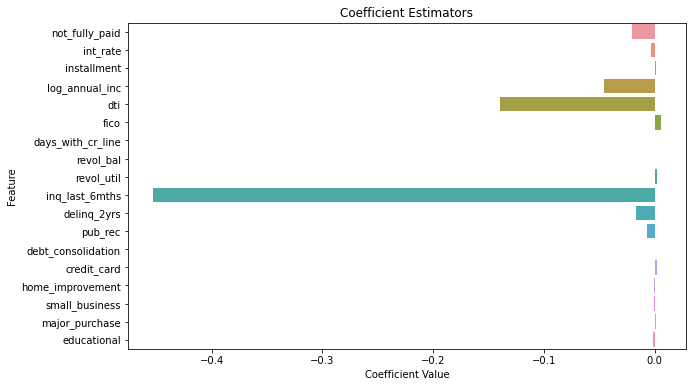

In [38]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize and train the decision tree classifier with a specified maximum depth
model = LogisticRegression()  # You can change the max_depth value as needed
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for validation set
val_cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate precision-recall curve
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Create a table for the coefficient estimators
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coefficients)

# Plot the coefficient estimators
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coefficient Estimators')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Model 2 - decision tree

Validation Accuracy: 0.9869519832985386
Validation Confusion Matrix:
[[ 337   20]
 [   5 1554]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       357
           1       0.99      1.00      0.99      1559

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



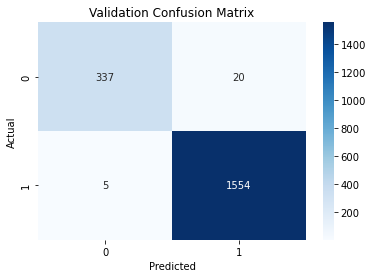

Test Accuracy: 0.9859081419624217
Test Confusion Matrix:
[[ 354   22]
 [   5 1535]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       376
           1       0.99      1.00      0.99      1540

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



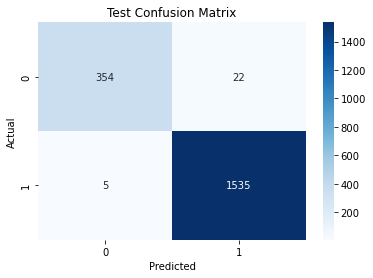

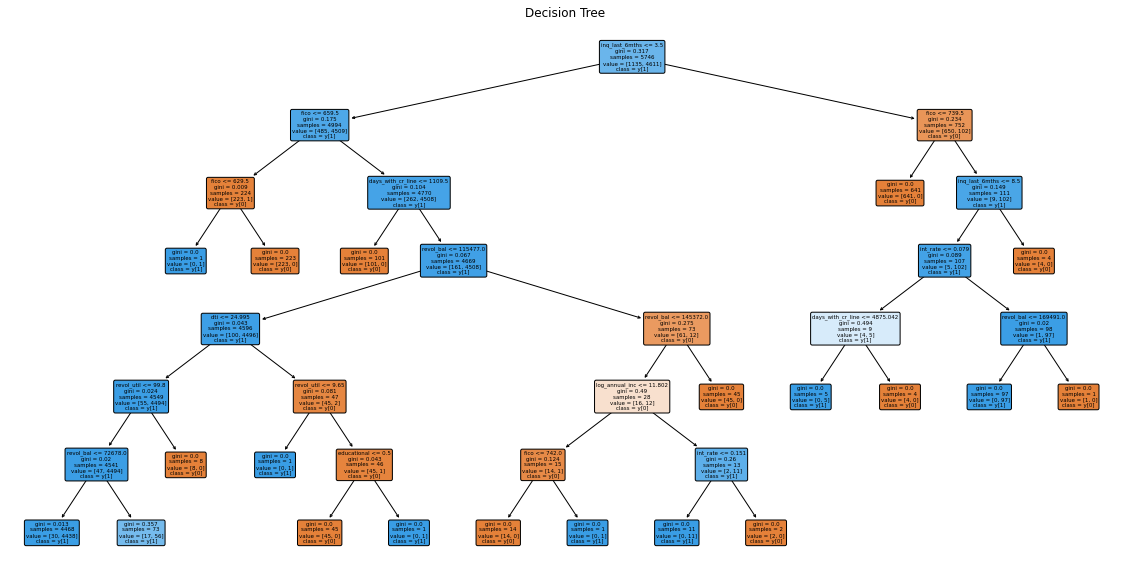

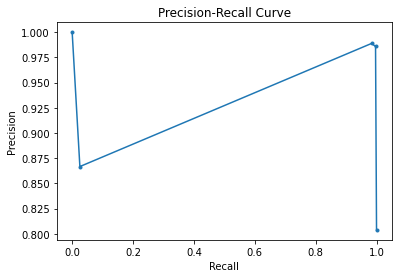

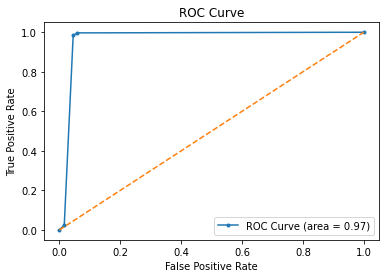

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=7) 
model.fit(X_train, y_train) 

# Validate the model 
y_val_pred = model.predict(X_val) 
val_accuracy = accuracy_score(y_val, y_val_pred) 
print(f'Validation Accuracy: {val_accuracy}') 
print('Validation Confusion Matrix:') 
print(confusion_matrix(y_val, y_val_pred)) 
print('Validation Classification Report:') 
print(classification_report(y_val, y_val_pred)) 

# Plot confusion matrix for validation set 
val_cm = confusion_matrix(y_val, y_val_pred) 
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Validation Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 

# Test the model 
y_test_pred = model.predict(X_test) 
test_accuracy = accuracy_score(y_test, y_test_pred) 
print(f'Test Accuracy: {test_accuracy}') 
print('Test Confusion Matrix:') 
print(confusion_matrix(y_test, y_test_pred)) 
print('Test Classification Report:') 
print(classification_report(y_test, y_test_pred)) 

# Plot confusion matrix for test set 
test_cm = confusion_matrix(y_test, y_test_pred) 
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Test Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

# Plot decision tree graph 
plt.figure(figsize=(20,10)) 
plot_tree(model, filled=True, feature_names=X.columns, class_names=True, rounded=True) 
plt.title('Decision Tree') 
plt.show()

# Generate precision-recall curve
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Model 3 - Naive Bayes

Validation Accuracy: 0.8716075156576201
Validation Confusion Matrix:
[[ 150  207]
 [  39 1520]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.42      0.55       357
           1       0.88      0.97      0.93      1559

    accuracy                           0.87      1916
   macro avg       0.84      0.70      0.74      1916
weighted avg       0.86      0.87      0.86      1916



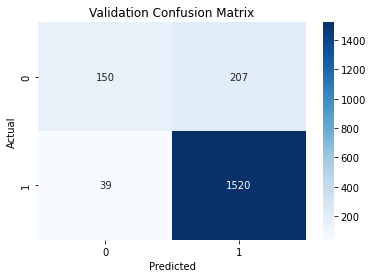

Test Accuracy: 0.8648225469728601
Test Confusion Matrix:
[[ 159  217]
 [  42 1498]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.42      0.55       376
           1       0.87      0.97      0.92      1540

    accuracy                           0.86      1916
   macro avg       0.83      0.70      0.74      1916
weighted avg       0.86      0.86      0.85      1916



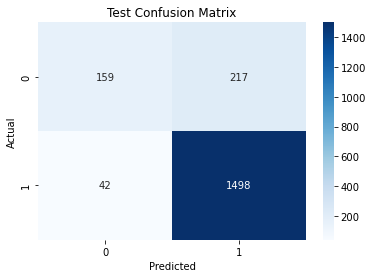

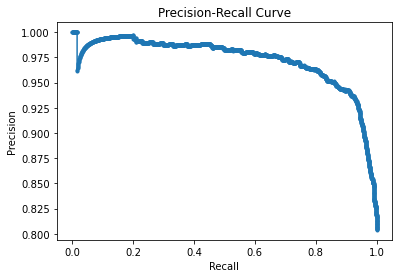

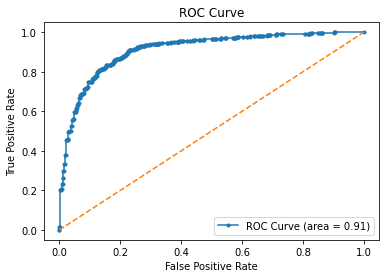

In [33]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for validation set
val_cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate precision-recall curve
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Model 4 - KNN

Validation Accuracy: 0.8262004175365344
Validation Confusion Matrix:
[[  73  284]
 [  49 1510]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.20      0.30       357
           1       0.84      0.97      0.90      1559

    accuracy                           0.83      1916
   macro avg       0.72      0.59      0.60      1916
weighted avg       0.80      0.83      0.79      1916



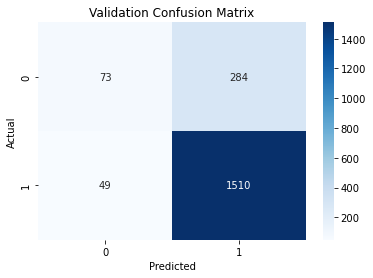

Test Accuracy: 0.8235908141962421
Test Confusion Matrix:
[[  96  280]
 [  58 1482]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.26      0.36       376
           1       0.84      0.96      0.90      1540

    accuracy                           0.82      1916
   macro avg       0.73      0.61      0.63      1916
weighted avg       0.80      0.82      0.79      1916



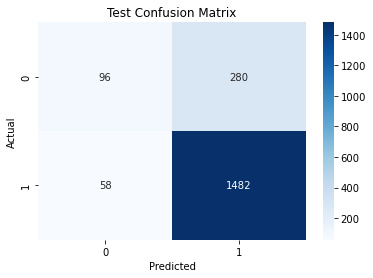

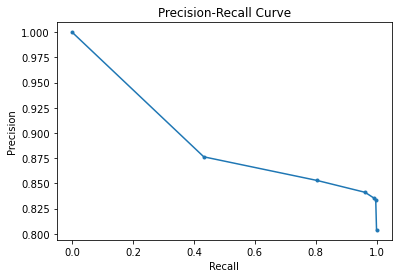

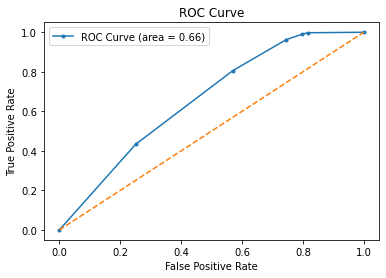

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5) # You can change the number of neighbors as needed 
model.fit(X_train, y_train) 

# Validate the model 
y_val_pred = model.predict(X_val) 
val_accuracy = accuracy_score(y_val, y_val_pred) 
print(f'Validation Accuracy: {val_accuracy}') 
print('Validation Confusion Matrix:') 
print(confusion_matrix(y_val, y_val_pred)) 
print('Validation Classification Report:') 
print(classification_report(y_val, y_val_pred)) 

# Plot confusion matrix for validation set 
val_cm = confusion_matrix(y_val, y_val_pred) 
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Validation Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show() 

# Test the model 
y_test_pred = model.predict(X_test) 
test_accuracy = accuracy_score(y_test, y_test_pred) 
print(f'Test Accuracy: {test_accuracy}') 
print('Test Confusion Matrix:') 
print(confusion_matrix(y_test, y_test_pred)) 
print('Test Classification Report:') 
print(classification_report(y_test, y_test_pred)) 

# Plot confusion matrix for test set 
test_cm = confusion_matrix(y_test, y_test_pred) 
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues') 
plt.title('Test Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.show()

# Generate precision-recall curve
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### Model 5 - gradient descent

Validation Accuracy: 0.8136743215031316
Validation Confusion Matrix:
[[   0  357]
 [   0 1559]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.81      1.00      0.90      1559

    accuracy                           0.81      1916
   macro avg       0.41      0.50      0.45      1916
weighted avg       0.66      0.81      0.73      1916



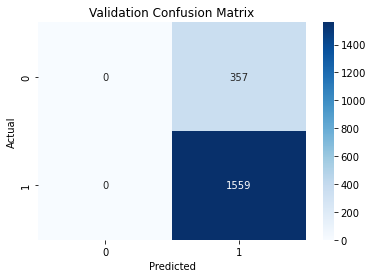

Test Accuracy: 0.8037578288100209
Test Confusion Matrix:
[[   0  376]
 [   0 1540]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.80      1.00      0.89      1540

    accuracy                           0.80      1916
   macro avg       0.40      0.50      0.45      1916
weighted avg       0.65      0.80      0.72      1916



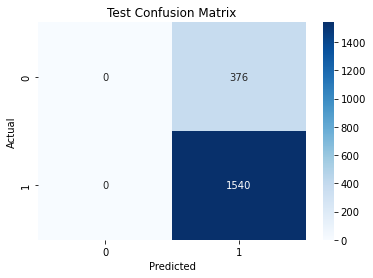

In [41]:
# Add a column of ones to X (for the intercept term)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
theta = np.zeros(X_train.shape[1])
learning_rate = 0.01
num_iterations = 1000

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * (y @ np.log(h) + (1 - y) @ np.log(1 - h))
    return cost

# Define the gradient descent function
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

# Predict function
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

# Validate the model
y_val_pred = predict(X_val, theta)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for validation set
val_cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the model
y_test_pred = predict(X_test, theta)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model 6 - random forest

Validation Accuracy: 0.9895615866388309
Validation Confusion Matrix:
[[ 339   18]
 [   2 1557]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       357
           1       0.99      1.00      0.99      1559

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



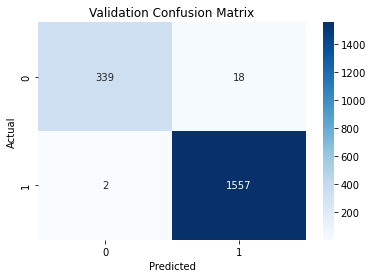

Test Accuracy: 0.9874739039665971
Test Confusion Matrix:
[[ 355   21]
 [   3 1537]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       376
           1       0.99      1.00      0.99      1540

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



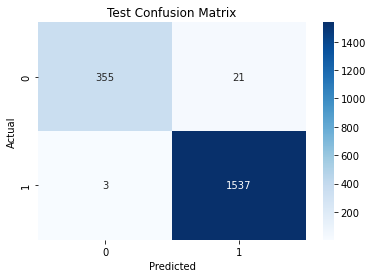

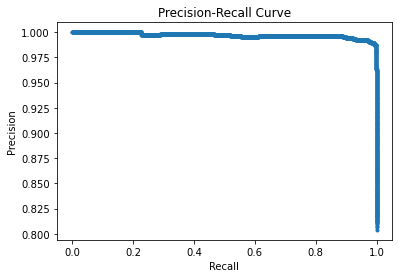

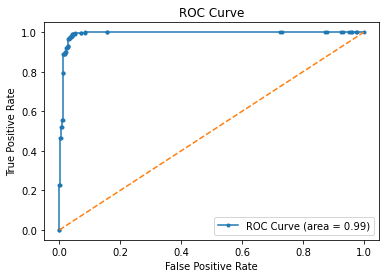

In [42]:
from sklearn.ensemble import RandomForestClassifier

X = dfn[['not_fully_paid',
 'int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_bal',
 'revol_util',
 'inq_last_6mths',
 'delinq_2yrs',
 'pub_rec',
 'debt_consolidation',
 'credit_card',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']]  # Predictor

y = dfn['credit_policy']            # Target

# Split the data into training (60%), validation (20%), and testing (20%) sets 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) 
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) 


model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # You can adjust the parameters as needed
model.fit(X_train, y_train)

# Validate the model
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for validation set
val_cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the model
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Generate precision-recall curve
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, marker='.', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## 5. Deep Learning

In [82]:
!pip install cryptography==38.0.4

In [84]:
!pip install pyopenssl --upgrade

  Attempting uninstall: cryptography
    Found existing installation: cryptography 38.0.4
    Uninstalling cryptography-38.0.4:
      Successfully uninstalled cryptography-38.0.4
  Attempting uninstall: pyopenssl
    Found existing installation: pyOpenSSL 21.0.0
    Uninstalling pyOpenSSL-21.0.0:
      Successfully uninstalled pyOpenSSL-21.0.0


Epoch 1/50
180/180 [==============================] - 1s 4ms/step - loss: 29.1749 - accuracy: 0.7242 - val_loss: 21.9346 - val_accuracy: 0.8246
Epoch 2/50
180/180 [==============================] - 0s 2ms/step - loss: 40.6244 - accuracy: 0.7358 - val_loss: 11.5027 - val_accuracy: 0.7677
Epoch 3/50
180/180 [==============================] - 0s 2ms/step - loss: 21.0289 - accuracy: 0.7337 - val_loss: 19.5624 - val_accuracy: 0.8304
Epoch 4/50
180/180 [==============================] - 0s 3ms/step - loss: 39.9323 - accuracy: 0.7529 - val_loss: 17.3093 - val_accuracy: 0.7965
Epoch 5/50
180/180 [==============================] - 0s 2ms/step - loss: 17.6054 - accuracy: 0.7496 - val_loss: 21.3738 - val_accuracy: 0.5861
Epoch 6/50
180/180 [==============================] - 0s 2ms/step - loss: 19.3283 - accuracy: 0.7600 - val_loss: 18.2844 - val_accuracy: 0.5929
Epoch 7/50
180/180 [==============================] - 0s 2ms/step - loss: 13.1926 - accuracy: 0.7658 - val_loss: 42.9636 - val_accuracy:

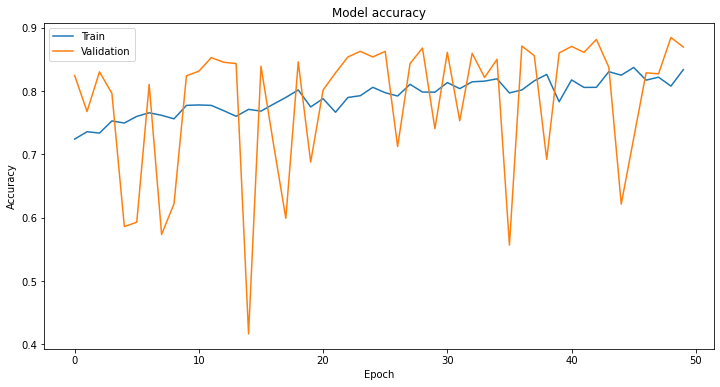

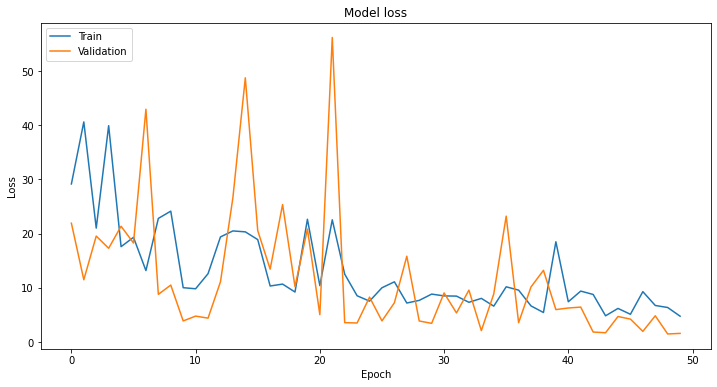

60/60 [==============================] - 0s 1ms/step
Validation Accuracy: 0.8695198329853863
Validation Confusion Matrix:
[[ 285   72]
 [ 178 1381]]
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.80      0.70       357
           1       0.95      0.89      0.92      1559

    accuracy                           0.87      1916
   macro avg       0.78      0.84      0.81      1916
weighted avg       0.89      0.87      0.88      1916



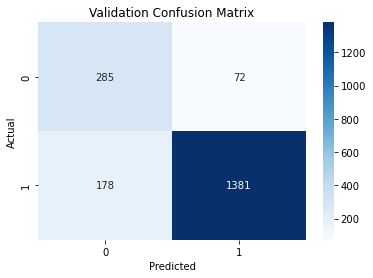

60/60 [==============================] - 0s 1ms/step
Test Accuracy: 0.8585594989561587
Test Confusion Matrix:
[[ 289   87]
 [ 184 1356]]
Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.77      0.68       376
           1       0.94      0.88      0.91      1540

    accuracy                           0.86      1916
   macro avg       0.78      0.82      0.79      1916
weighted avg       0.88      0.86      0.86      1916



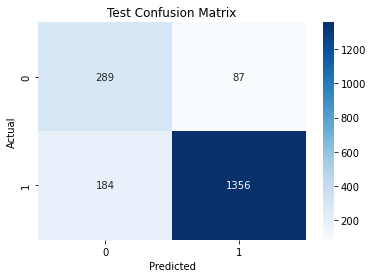

In [43]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Plot training & validation accuracy values 
plt.figure(figsize=(12, 6)) 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.show() 

# Plot training & validation loss values 
plt.figure(figsize=(12, 6)) 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Validation'], loc='upper left') 
plt.show()

# Validate the model
y_val_pred = (model.predict(X_val) > 0.5).astype("int32")
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')
print('Validation Confusion Matrix:')
print(confusion_matrix(y_val, y_val_pred))
print('Validation Classification Report:')
print(classification_report(y_val, y_val_pred))

# Plot confusion matrix for validation set
val_cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test the model
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')
print('Test Confusion Matrix:')
print(confusion_matrix(y_test, y_test_pred))
print('Test Classification Report:')
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix for test set
test_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5. Model Selection

Model Validation Accuracies

* Logistic Regression: 87.06%
* Decision Tree: 98.70%
* Naive Bayes: 87.16%
* K-Nearest Neighbors (KNN): 82.62%
* Gradient Descent: 81.37%
* Random Forest: 98.96%
* Deep Learning: 86.95%

Based on the validation accuracies of various models, Random Forest stands out as the best-performing model with a validation accuracy of 98.96%, the highest among all models tested. Furthermore, its test accuracy of 98.75% and AUC-ROC score of 0.99 confirm its strong predictive capability and robustness. This makes Random Forest the most suitable choice for the underwriting model, effectively balancing accuracy and reliability in predicting loan risks.